<a href="https://colab.research.google.com/github/Faheemfemu/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Netflix Movies and TV Shows Clustering**


##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**



This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [70]:
# Import Libraries
import pandas as pd # Data manpulation
import numpy as np # handling matrices
from datetime import datetime as dt # Handling datetime
from scipy.stats import * # statistics analysis
import math # importing mathematics module

# Visulization 
import matplotlib.pyplot as plt #matplot 
import missingno as msno #visulization for missing values
%matplotlib  inline
import seaborn as sns # Visulization 
sns.set()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from wordcloud import WordCloud, STOPWORDS

# Handling warnings
import warnings
warnings.filterwarnings('ignore')
import os
import re
from sklearn.preprocessing import RobustScaler #Handling Outliers
# extracting the stopwords from nltk library and some nlp libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from scipy import sparse as sp
import string
import unicodedata
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

# importing sklearn algorithms to predict the output from the model
from sklearn.cluster import KMeans
# from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.feature_extraction.text import CountVectorizer
     

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [2]:
# Load Dataset
#mounting the google drive to access the files
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Module 4 Machine Learning/Capstone Project - Unsupervised Machine Learning/ NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

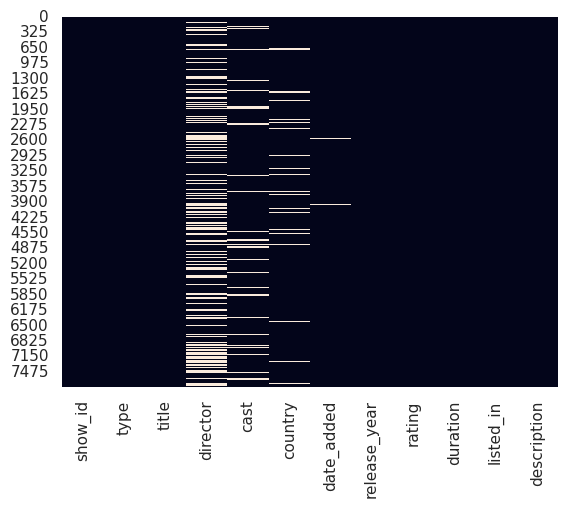

In [8]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(),cbar=False);

### What did you know about your dataset?

Answer Here

* Dataset has total of 7787 Raw and 12 columns.
* Dataset is a mixture of integer and object data type.


* The missing values in the director, cast, and country attributes can be replaced with 'Unknown'
* 10 records with missing values in the date_added column can be dropped.
* The missing values in rating can be imputed with its mode, since this attribute is discrete.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

Answer Here
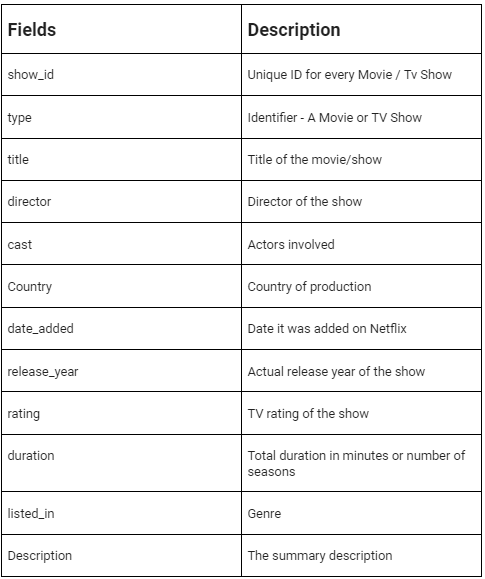

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in df.columns:
  print("No. of unique values in '{}' is {}.".format(i, df[i].nunique()))
     

No. of unique values in 'show_id' is 7787.
No. of unique values in 'type' is 2.
No. of unique values in 'title' is 7787.
No. of unique values in 'director' is 4049.
No. of unique values in 'cast' is 6831.
No. of unique values in 'country' is 681.
No. of unique values in 'date_added' is 1565.
No. of unique values in 'release_year' is 73.
No. of unique values in 'rating' is 14.
No. of unique values in 'duration' is 216.
No. of unique values in 'listed_in' is 492.
No. of unique values in 'description' is 7769.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
df['type'].value_counts()



Movie      5377
TV Show    2410
Name: type, dtype: int64

In [13]:
df['director'].value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          10
David Dhawan               9
Ryan Polito                8
Name: director, dtype: int64

In [14]:
# Top Countries
df['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [15]:
# Genre of shows
df['listed_in'].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 492, dtype: int64

In [16]:
# Choosing the primary country and primary genre to simplify the analysis
df['country'] = df['country'].astype(str)
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])
     

In [17]:
#Number of movies/shows from country
df['country'].value_counts()

United States     2883
India              956
United Kingdom     577
nan                507
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [18]:
#Type of shows 
df['listed_in'].value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           690
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         359
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 232
Docuseries                       194
Anime Series                     148
International Movies             114
TV Comedies                      110
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             37
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Classic & Cult TV                 21
Independent Movies                20
Anime Features                    19
Music & Musicals                  17
T

In [19]:
#Typecasting duration from string to integer
df['duration']=df['duration'].apply(lambda x:int(x.split()[0]))

In [20]:
df.duration.dtype

dtype('int64')

In [21]:
#Typecasting date_added from string to date and time
df['date_added']=pd.to_datetime(df['date_added'])

In [22]:
#can see the starting and ending of movies added date
df.date_added.min(), df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

In [23]:
#Creating new attributes month and year referrence from date_added
df['month']=df['date_added'].dt.month
df['year']=df['date_added'].dt.year
df.drop('date_added', axis=1,inplace=True)

<Axes: xlabel='rating', ylabel='count'>

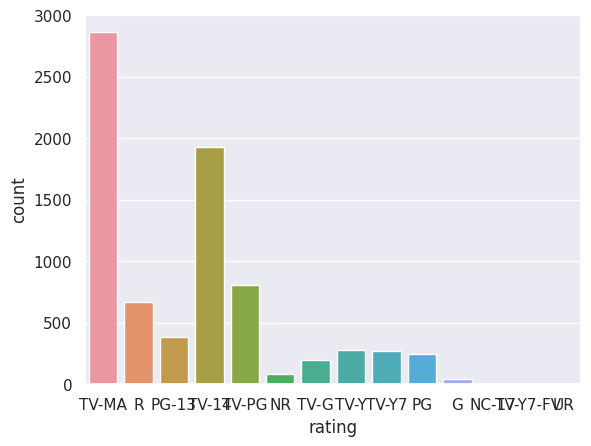

In [24]:
#Changing ratings into age restrictions
sns.countplot(x = 'rating', data=df)
     

In [25]:
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [26]:
#changing rating values 
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['rating'].replace(ratings,inplace = True)
df['rating'].unique()
     

array(['Adults', 'Teens', 'Older Kids', 'Kids', nan], dtype=object)

<Axes: xlabel='rating', ylabel='count'>

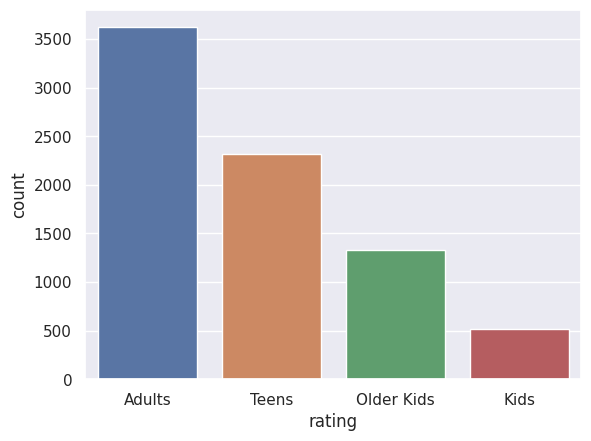

In [27]:
sns.countplot(x='rating', data=df)

### What all manipulations have you done and insights you found?

Answer Here.

* there is two type of Tv shows and movie
* Listed out top 10 country's i.e., the country holding maximun number of TV shows and movies.
* Listed out top 10 director's.
* Duration period has changed string to integer.
* dated has been changed string into datetime.
* Datetime has splited into more number of features like day, month and year.
* More number of ratings segregated.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 pie & count

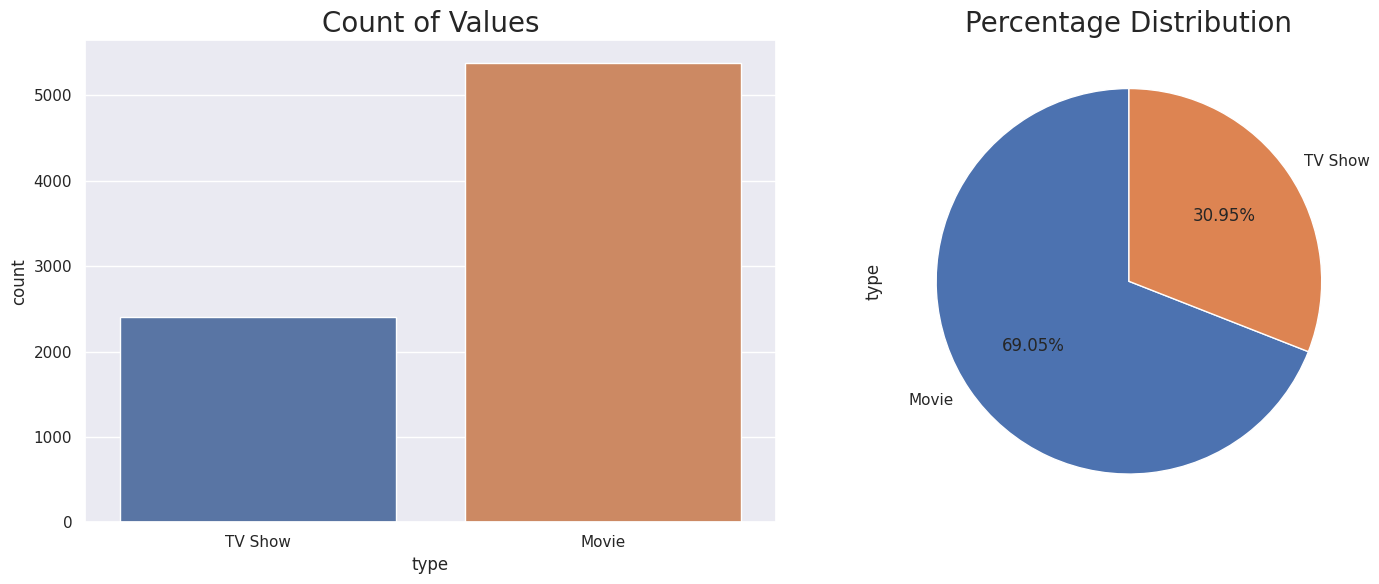

In [28]:
# Chart - 1 visualization code
fig,ax = plt.subplots(1,2, figsize=(14,5))

# countplot 
graph = sns.countplot(x = 'type', data = df, ax=ax[0])
graph.set_title('Count of Values', size=20)

# piechart
df['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1], figsize=(15,6),startangle=90)
plt.title('Percentage Distribution', size=20)

plt.tight_layout()
plt.show()
     

##### 1. Why did you pick the specific chart?



To Know the Percentage of Movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

* Movies has more number of counts than TV Shows.
* 31% of the data are from TV shows, while 69% of the data are from movies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

Handling both TV Shows and Movies is an challenging task for an netflix

#### Chart - 2 Directors Analysis

Text(0.5, 1.0, 'Top 10 directors')

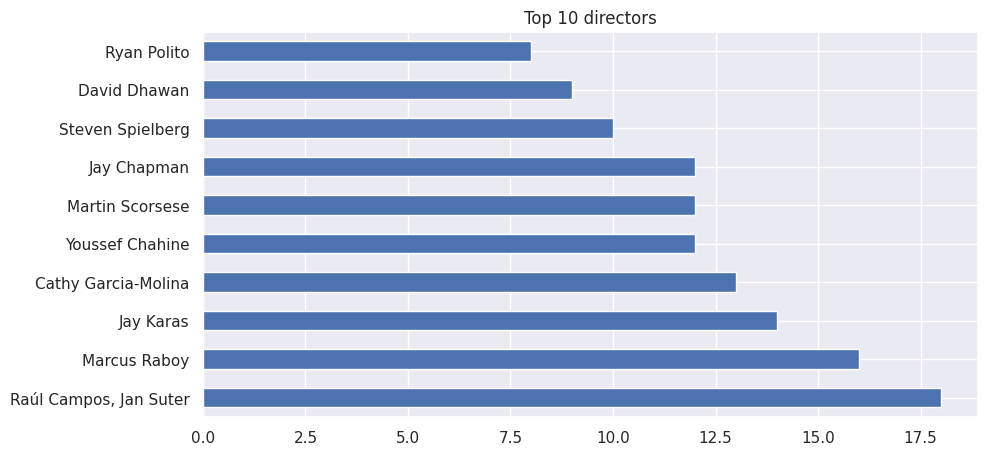

In [29]:
# Chart - 2 visualization code
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
df['director'].value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors')

##### 1. Why did you pick the specific chart?

Answer Here.
We will see the top 10 directors in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

Rahul Campos and Jan Suter both together directed 18 movies/TV shows.

#### Chart - 3  Country analysis

Text(0.5, 1.0, ' Top 10 countries')

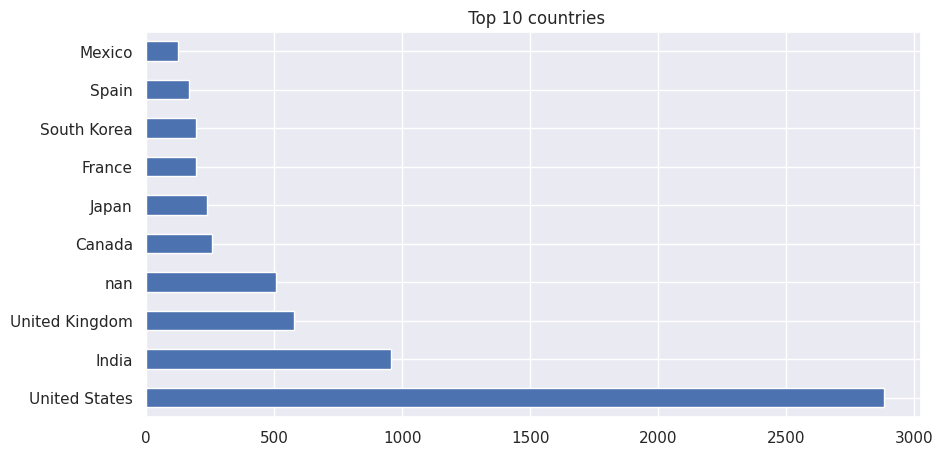

In [30]:
# Chart - 3 visualization code
plt.figure(figsize=(10,5))
df['country'].value_counts().head(10).plot(kind='barh')
plt.title(' Top 10 countries')

##### 1. Why did you pick the specific chart?

Answer Here.

As analysis the plot will know the top ten countries in the dataset which have more movies/TV shows.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

AS we see the bar plots the United States have more number of TV shows and movies and followed by India, United Kingdom.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

Needs to improve and analysis on the other countries.

#### Chart - 4 Releas year

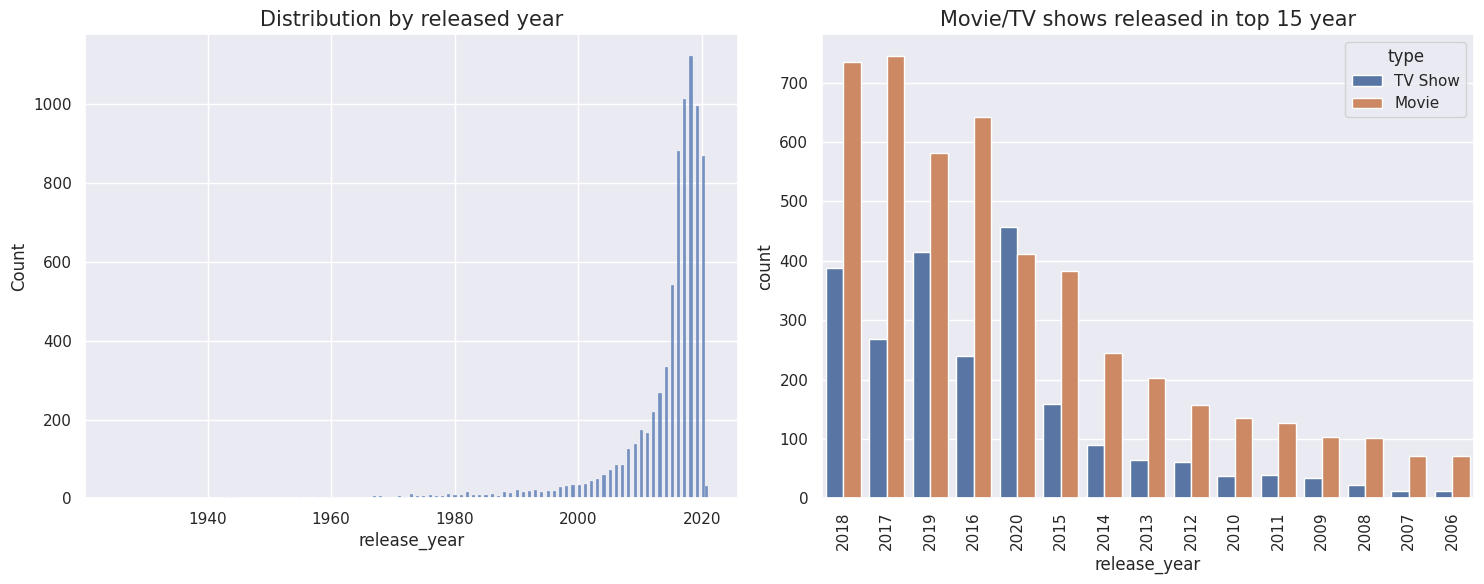

In [31]:
# Chart - 4 visualization code
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
hist = sns.histplot(df['release_year'], ax=ax[0])
hist.set_title('Distribution by released year', size=15)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=df, order=df['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Distribution of this graph giving the information anbout in which year movies/TV shows released.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.
* Netflix starts releasing more Movies/TV shows in recent years compared to old ones.
* Most Movies and TV shows are available on Netflix between 2015 and 2020, and the highest are in 2018.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

As comparing the releasing year data in dataset after 2018 its slowly decreasing the number of TV shows/movies.

#### Chart - 5  Month analysis

Text(0.5, 0, '')

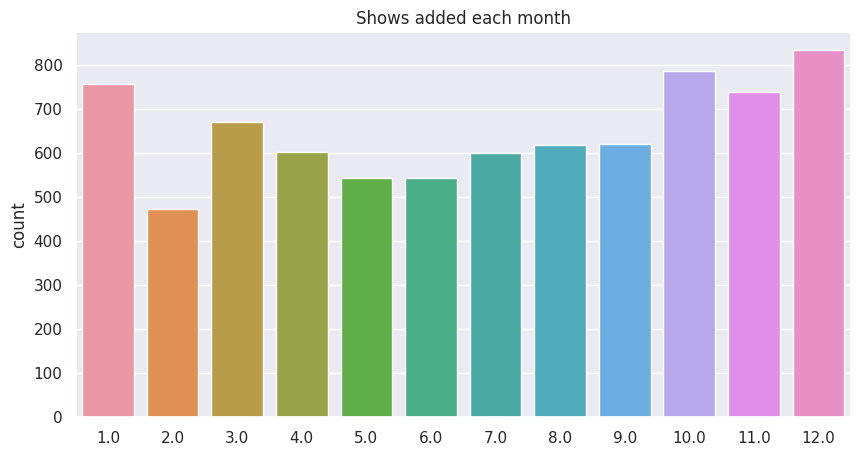

In [32]:
# Chart - 5 visualization code
plt.figure(figsize = (10,5)) 
sns.countplot(x='month',data=df)

plt.title('Shows added each month')
plt.xlabel('')

##### 1. Why did you pick the specific chart?

Answer Here.

Monthly analysis as per given dataset

##### 2. What is/are the insight(s) found from the chart?

Answer Here

October, November, December and January months have the peak time which contains more data.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

Will understand the data which month having more data as well as least data in other months.

#### Chart - 6

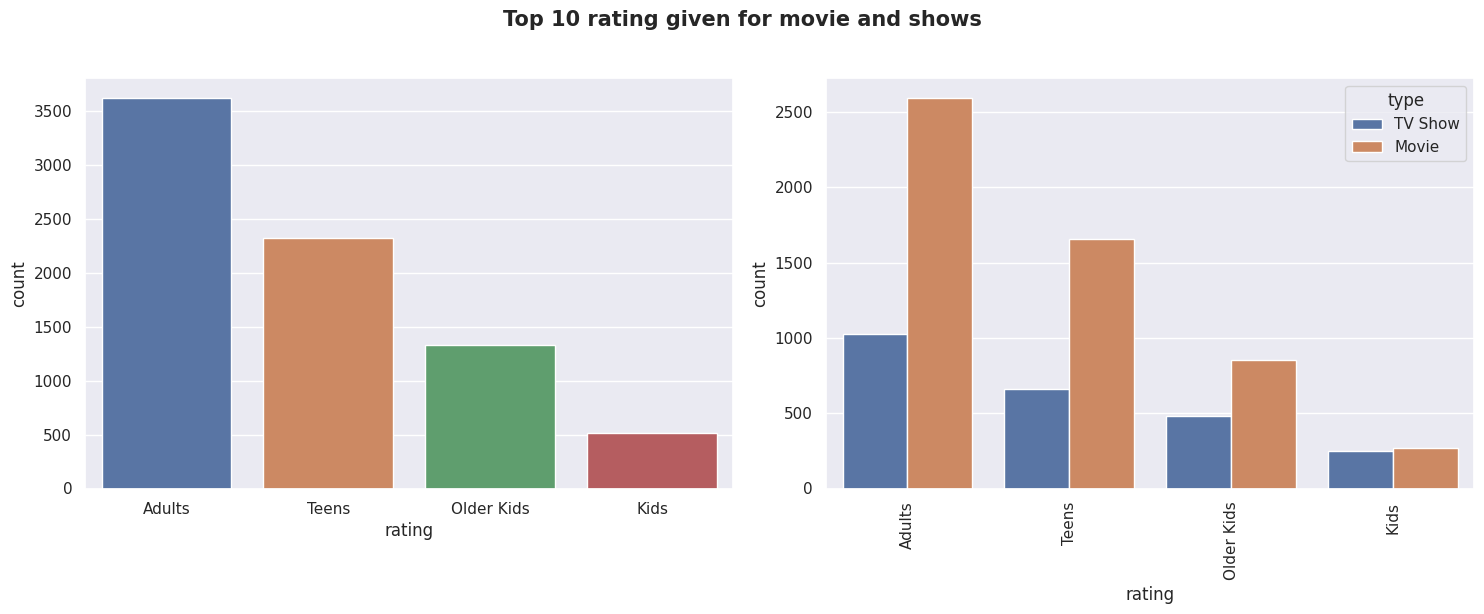

In [33]:
# Chart - 6 visualization code
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating given for movie and shows', weight='bold', y=1.02, size=15)

# univariate analysis
sns.countplot(x="rating", data=df, order=df['rating'].value_counts().index[0:10], ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
for rating analysis

##### 2. What is/are the insight(s) found from the chart?

Answer Here.
* The majority of Movies and TV shows have a rating of Adults, followed by Teens.
* When compared to TV shows, Movies receive the highest rating, which is pretty obvious given that a number of Movies are higher compared to TV shows, as we saw earlier in the type column.

#### Chart - 7 Number of Seasons Analysis

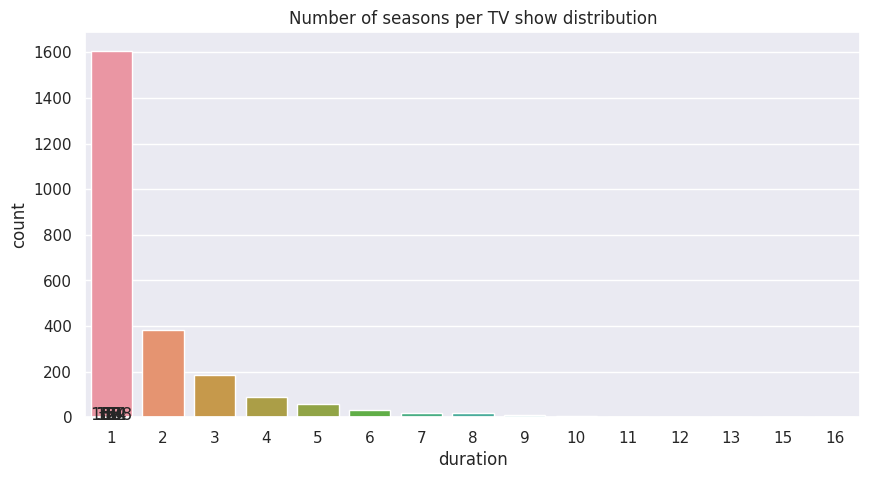

In [34]:
# Chart - 7 visualization code
# Seasons in each TV show
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10))

##### 1. Why did you pick the specific chart?

Answer Here.4

Gives the information about which show have the more seasons.


##### 2. What is/are the insight(s) found from the chart?

Answer Here.

The TV series in the dataset have up to 16 seasons, however the bulk of them only have one.

#### Chart - 8  Duration Distribution Analysis

Text(0.5, 1.0, 'Movie duration distribution')

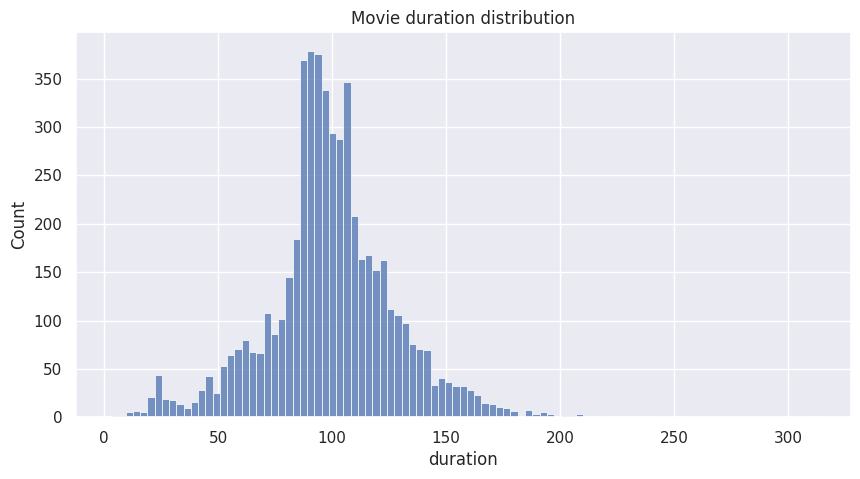

In [35]:
# Chart - 8 visualization code
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=df[df['type']=='Movie'])
plt.title('Movie duration distribution')

##### 1. Why did you pick the specific chart?

Answer Here.

Length of movie analysis.

##### 2. What is/are the insight(s) found from the chart?

In [36]:
df[df['type']=='Movie'].duration.describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

Answer Here.

The minimum duration of 3 minutes and maximum is 312 minutes.


#### Chart - 9 Type of Movies analysis

Text(0.5, 1.0, 'Top 10 genres for movies')

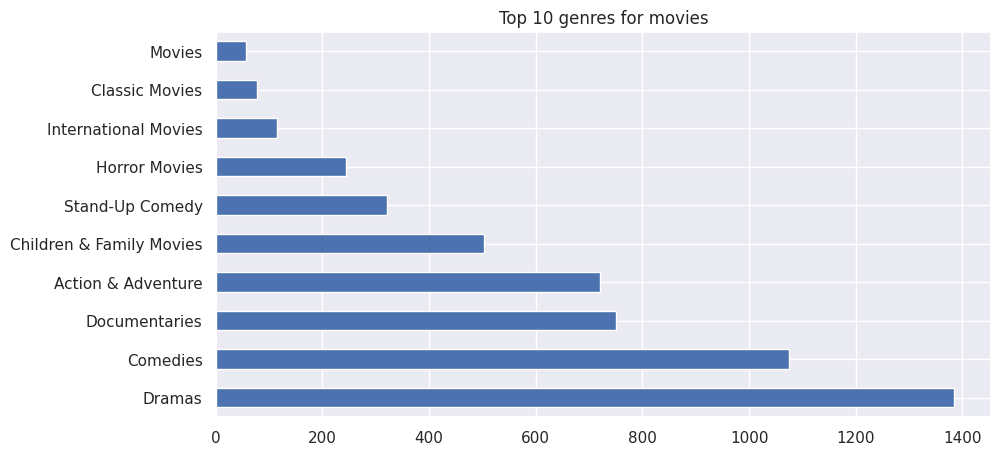

In [37]:
# Chart - 9 visualization code
# Top 10 genre for movies
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].listed_in.value_counts().head(10).plot(kind='barh')
plt.title('Top 10 genres for movies')


##### 1. Why did you pick the specific chart?

Answer Here.

In movies which type of Genre having the more data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

Dramas, comedy and documentry have more movies.

#### Chart - 10  Type of TV Shows

Text(0.5, 1.0, 'Top 10 genres for movies')

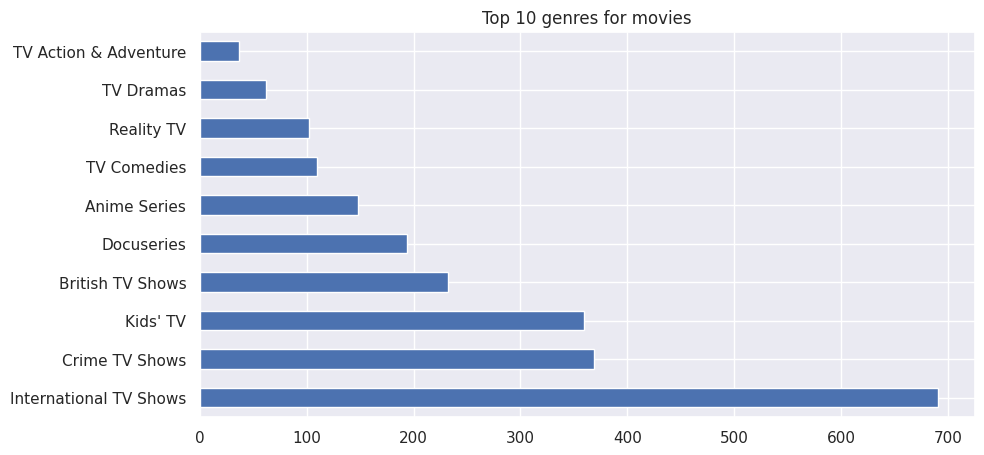

In [38]:
# Chart - 10 visualization code
# Top 10 genre for movies
plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().head(10).plot(kind='barh')
plt.title('Top 10 genres for movies')

##### 1. Why did you pick the specific chart?

Answer Here.

As we know the more type of data in Genre we can see in the tv shows.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

International TV Shows, Kids TV, Crime TV Show have the more popular.

#### Chart - 11  Movie Length

Text(0.5, 0, 'Year')

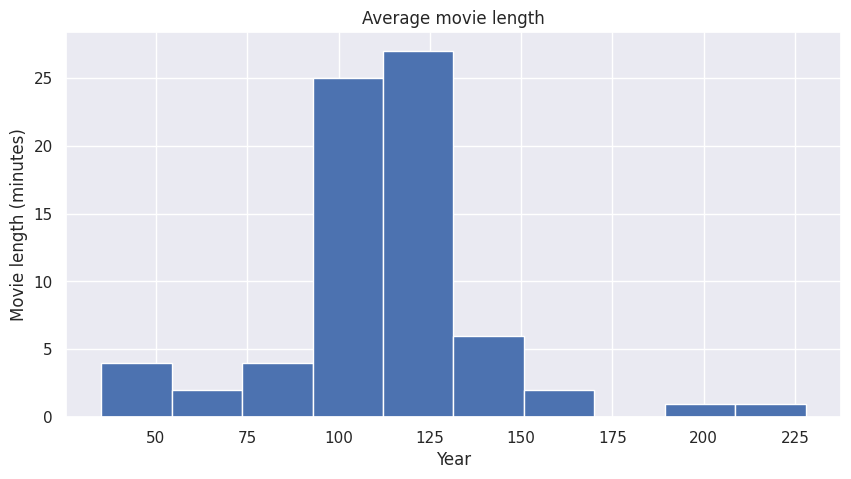

In [39]:
# Chart - 11 visualization code
# Average movie length over the years
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='hist')
plt.title('Average movie length')
plt.ylabel('Movie length (minutes)')
plt.xlabel('Year')
     

##### 1. Why did you pick the specific chart?

Answer Here.

Average movie length in a year.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

After 2000 year netflix movies have been continuosly decerasing.

#### Chart - 12 WordCloud

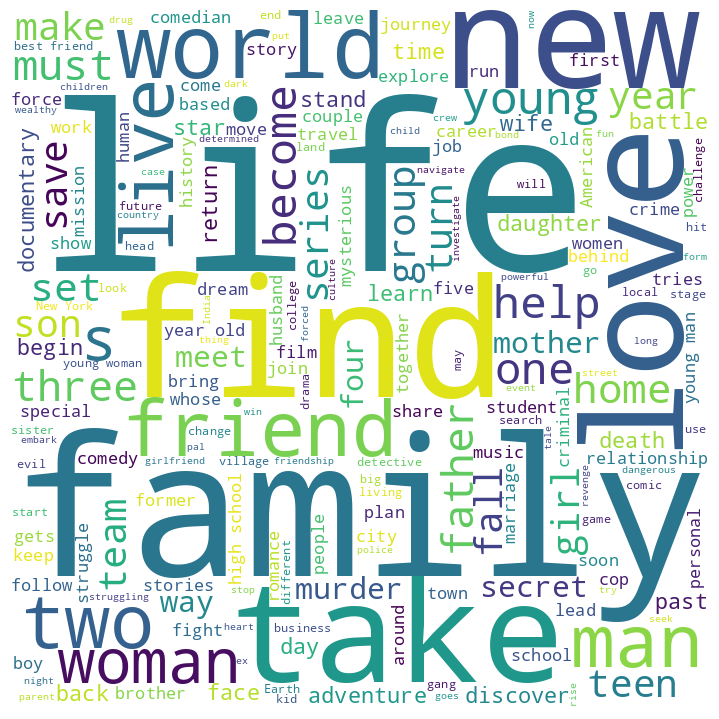

In [40]:
# Chart - 12 visualization code
comment_words = ''
stopwords = set(STOPWORDS)

for term in df.description.values:
    
    # typecaste each val to string
    term = str(term)

    # split the value
    tokens = term.split()  
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (14,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)


##### 1. Why did you pick the specific chart?

Answer Here.

plotting the some key words which contains from the Netflix data

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

Type of keywords from Netflix dataset like: family,life, friend, find, love, woman, young, man, love etc

#### Chart - 13 Correlation Heatmap

In [ ]:
# Create Geo plot to see which country produces more content.

# Define data
data = dict(type='choropleth', 
            locations = country_code_df['Code'], 
            z = country_code_df['Count'], 
            text = country_code_df['Country'],
            marker = dict(line = dict (color = 'grey',width = 0.5)),
            # colorbar = dict(autotick = True, title = '')
            )

# Define layout.
layout = dict(title = 'Country-wise Content Production', title_x=0.5,height=700, width=1500,
              geo = dict( projection = {'type':'times'},
                         showlakes = False,
                         showcoastlines = False,
                         showframe = False, 
                         showocean = False,
                         showland = False,
                         fitbounds = 'locations',
                         ))

# Plot it.
country_plot = go.Figure(data = [data], 
              layout = layout
              )
# iplot(country_plot)
country_plot.show('png')

##### 1. Why did you pick the specific chart?

Answer Here.

Calculate correlation between each pair of variable

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

Here the correlation range -0.2 to 1.0. Whenever its corelating with self column we will get the higher corelation.duration and year having slightly correlating

#### Chart - 14 - Correlation Heatmap

<Axes: >

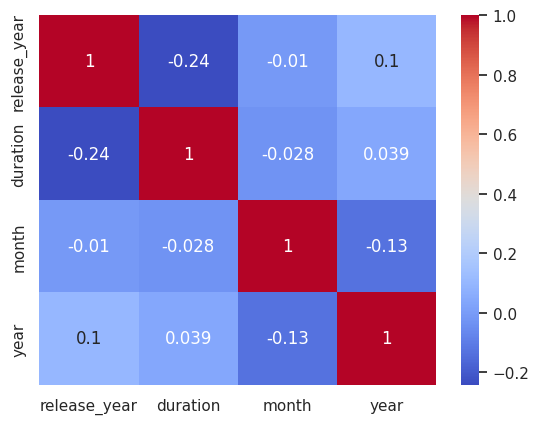

In [41]:
# Correlation Heatmap visualization code
corr_matrix=df.corr()
 
# plot it
sns.heatmap(corr_matrix, cmap="coolwarm",annot=True)

##### 1. Why did you pick the specific chart?

Answer Here.

Calculate correlation between each pair of variable

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Here the correlation range -0.2 to 1.0. Whenever its corelating with self column we will get the higher corelation.duration and year having slightly correlating

#### Chart - 15 - Pair Plot 

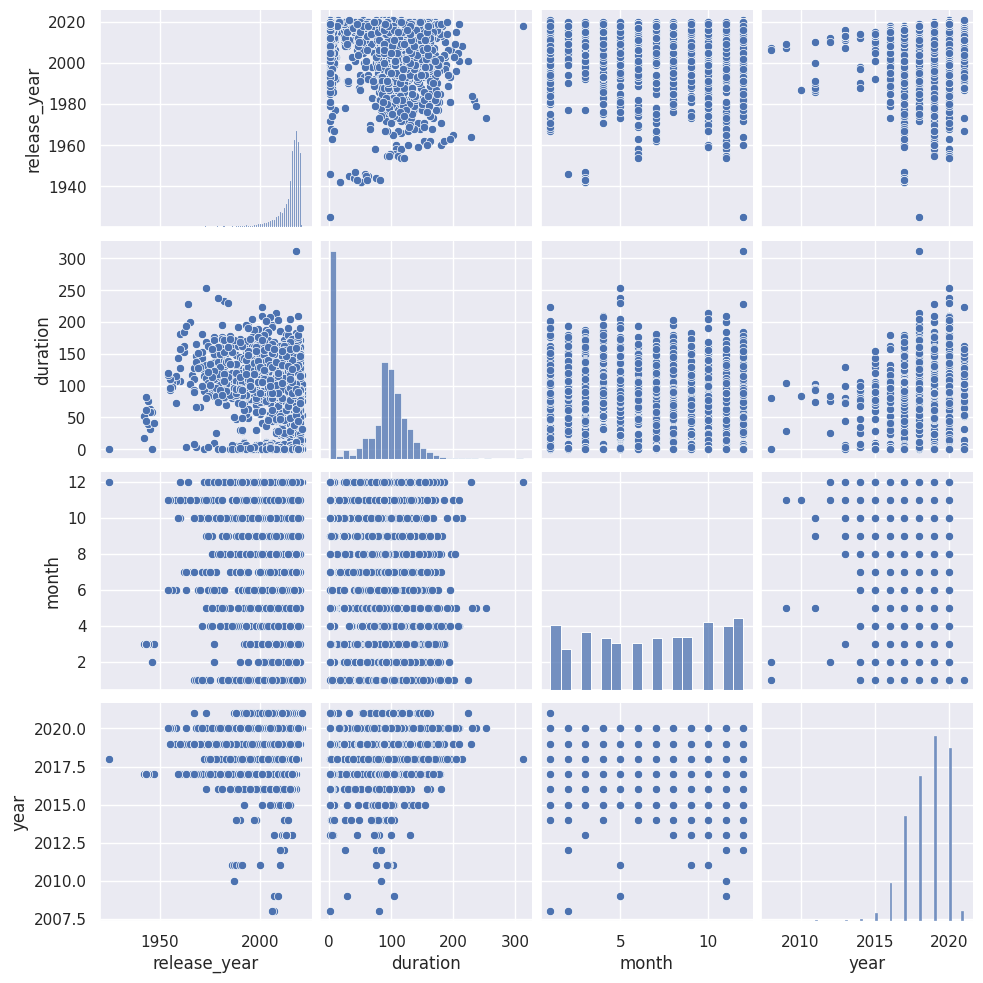

In [42]:
# Pair Plot visualization code
sns.pairplot(df)
     

##### 1. Why did you pick the specific chart?

Answer Here.

Pair plot Analysis: Gives the dataset distribution.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

The pair plot taken features as follows: release_year, duration, month, year.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Is 90 minutes the mean length of a movie on Netflix?
2. Number of Adults have the movies collection is 100 in the given dataset?
3. Overall Netflix released number of movies and TV shows 500?

Answer Here.


In [43]:
# Creating Parameter Class 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
    
  


# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()
     

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

Is 90 minutes the mean length of a movie on Netflix?

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value
hypothesis_1=df["duration"]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 90
sample_mean = hypothesis_1.mean()
size = len(hypothesis_1)
std=(variance(hypothesis_1))**0.5

In [45]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=hypothesis_1,col="Duration")
# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 1.3799134922373904e-286


##### Which statistical test have you done to obtain P-Value?

Answer Here.

z-test is used to do statistical test which gives the p-value

##### Why did you choose the specific statistical test?

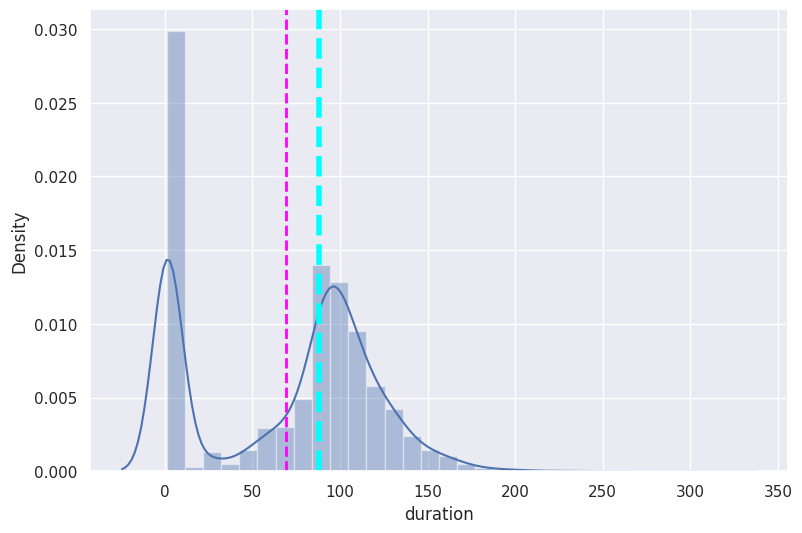

In [46]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypothesis_1)
sns.distplot(hypothesis_1)
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=4)

plt.show()

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

Number of Adults have the movies collection is 100 in the given dataset?

#### 2. Perform an appropriate statistical test.

In [47]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
hypothesis_2=df[(df['rating'])=='Adults'].value_counts()
# Getting the required parameter values for hypothesis testing
hypothesis_number = 100
sample_mean = hypothesis_1.mean()
size = len(hypothesis_2)
std=(variance(hypothesis_2))**0.5

In [48]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=hypothesis_2,col="Duration")
# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 0.0


##### Which statistical test have you done to obtain P-Value?

Answer Here.

z-test is used to do statistical test which gives the p-value

##### Why did you choose the specific statistical test?

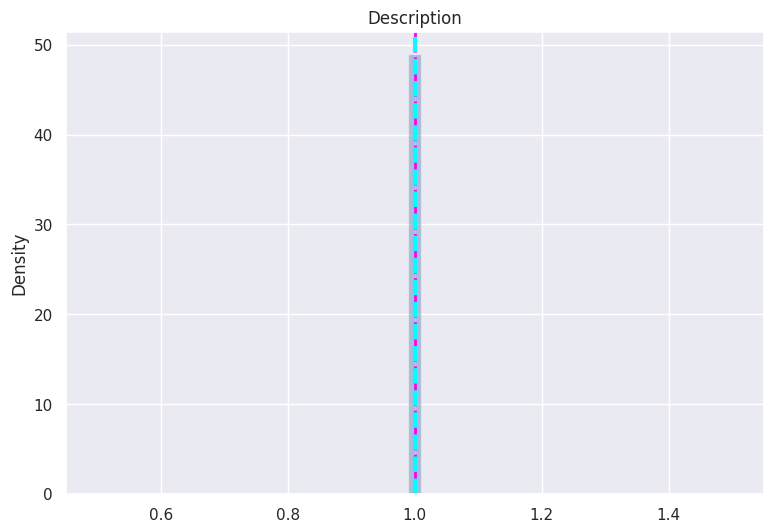

In [49]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypothesis_2)
sns.distplot(hypothesis_2)
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=3)
ax.set_title('Description')
plt.show()
     

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

Overall Netflix released number of movies and TV shows 500?

#### 2. Perform an appropriate statistical test.

In [50]:
# Perform Statistical Test to obtain P-Value
hypothesis_3=df["release_year"]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 500
sample_mean = hypothesis_3.mean()
size = len(hypothesis_3)
std=(variance(hypothesis_3))**0.5

In [51]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=hypothesis_3,col="Ratings")
# Getting Conclusion
print(conclusion(p))
     

Failed to reject the Null Hypothesis for p = 1.0.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

z-test is used to do statistical test which gives the p-value

##### Why did you choose the specific statistical test?

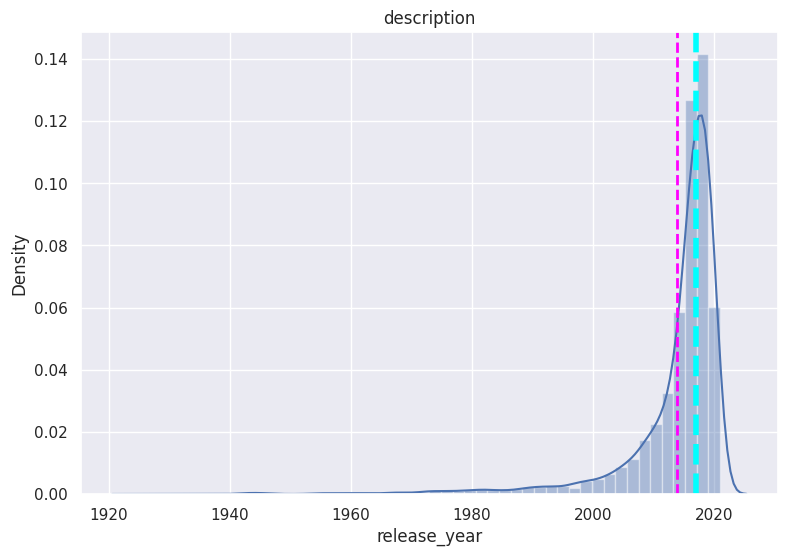

In [52]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypothesis_3)
sns.distplot(hypothesis_3)
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=4)
ax.set_title('description')
plt.show()
     


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [54]:
# Handling Missing Values & Missing Value Imputation
print(f"Before Handling Null Values: {df.shape}")
df[['cast','country','director']] = df[['cast','country','director']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0,inplace=True)
print(f"After Handling Null Values: {df.shape}")

Before Handling Null Values: (7787, 13)
After Handling Null Values: (7777, 13)


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.
Handling missing values is an important step to handle data integrity and consistency. Here if we remove the null values only from one feature which contain more Null values from director we will lose the data from other variables. So, I used to replace with Unknown.rating column's missing values fill with mode.

### 2. Handling Outliers

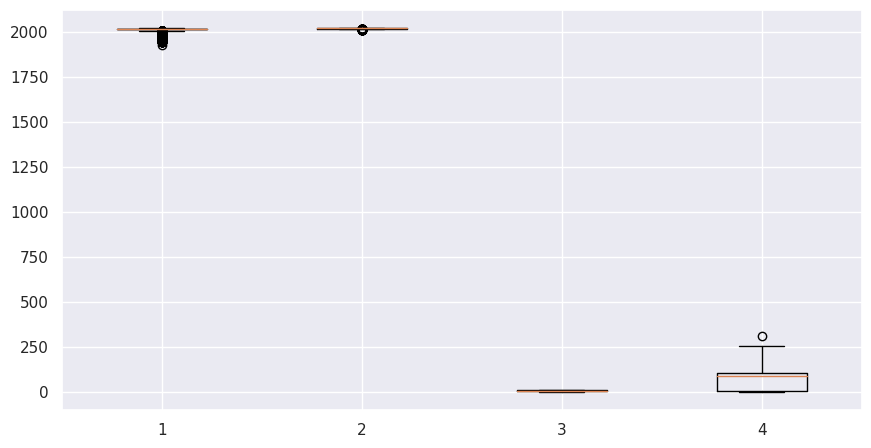

In [57]:
# Handling Outliers & Outlier treatments
out_data = [df['release_year'], df['year'], df['month'], df['duration']]
fig = plt.figure(figsize =(8, 4))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(out_data)
# show plot
plt.show()
     

In [58]:
scaler = RobustScaler()
cleaned_data = scaler.fit_transform(out_data)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

RobustScaler: We can use the RobustScaler from the scikit-learn library to scale the data in a way that is robust to outliers. The RobustScaler scales the data based on the interquartile range (IQR) instead of the mean and standard deviation, making it less sensitive to outliers.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [59]:
# Handling the data for Data Preprocessing
df.fillna('',inplace=True)
     

In [62]:
# Combining all the clustering attributes into a single column

df['cluster_attributes'] = (df['director'] + ' ' + 
                              df['cast'] +' ' + 
                                df['country'] +' ' + 
                                df['listed_in'] +' ' + 
                                df['description'])

In [67]:
df['cluster_attributes'].head()

0    Unknown João Miguel, Bianca Comparato, Michel ...
1    Jorge Michel Grau Demián Bichir, Héctor Bonill...
2    Gilbert Chan Tedd Chan, Stella Chung, Henley H...
3    Shane Acker Elijah Wood, John C. Reilly, Jenni...
4    Robert Luketic Jim Sturgess, Kevin Spacey, Kat...
Name: cluster_attributes, dtype: object

#### 1. Removing Non-ASCII Characters

In [68]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [71]:
# remove non-ascii characters
df['cluster_attributes'] = remove_non_ascii(df['cluster_attributes'])
     


In [73]:
df['cluster_attributes'][4]

'Robert Luketic Jim Sturgess, Kevin Spacey, Kate Bosworth, Aaron Yoo, Liza Lapira, Jacob Pitts, Laurence Fishburne, Jack McGee, Josh Gad, Sam Golzari, Helen Carey, Jack Gilpin United States Dramas A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.'

#### 2. Lower Casing

In [74]:
# Lower Casing
df['cluster_attributes']=df['cluster_attributes'].str.lower()

#### 3. Removing Punctuations

In [75]:
# Remove Punctuations
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)


In [77]:
# remove punctuations characters
df['cluster_attributes'] = df['cluster_attributes'].apply(remove_punctuation)

In [78]:
df['cluster_attributes'][4]

'robert luketic jim sturgess kevin spacey kate bosworth aaron yoo liza lapira jacob pitts laurence fishburne jack mcgee josh gad sam golzari helen carey jack gilpin united states dramas a brilliant group of students become cardcounting experts with the intent of swindling millions out of las vegas casinos by playing blackjack'

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [79]:
# Remove Stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [80]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [82]:
# Removing stop words
df['cluster_attributes'] = df['cluster_attributes'].apply(stopwords)

In [83]:
df['cluster_attributes'][4]

'robert luketic jim sturgess kevin spacey kate bosworth aaron yoo liza lapira jacob pitts laurence fishburne jack mcgee josh gad sam golzari helen carey jack gilpin united states dramas brilliant group students become cardcounting experts intent swindling millions las vegas casinos playing blackjack'

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [84]:
# Tokenization
tokenizer = TweetTokenizer()

In [86]:
# remove non-ascii characters
df['cluster_attributes'] = (df['cluster_attributes']).apply(lambda x: tokenizer.tokenize(x))

In [87]:
df['cluster_attributes'][4]

['robert',
 'luketic',
 'jim',
 'sturgess',
 'kevin',
 'spacey',
 'kate',
 'bosworth',
 'aaron',
 'yoo',
 'liza',
 'lapira',
 'jacob',
 'pitts',
 'laurence',
 'fishburne',
 'jack',
 'mcgee',
 'josh',
 'gad',
 'sam',
 'golzari',
 'helen',
 'carey',
 'jack',
 'gilpin',
 'united',
 'states',
 'dramas',
 'brilliant',
 'group',
 'students',
 'become',
 'cardcounting',
 'experts',
 'intent',
 'swindling',
 'millions',
 'las',
 'vegas',
 'casinos',
 'playing',
 'blackjack']

#### 8. Text Normalization

In [88]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
stemmer = SnowballStemmer('english')

In [89]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [91]:
df['cluster_attributes'] = df['cluster_attributes'].apply(lemmatize_verbs)

In [92]:
df['cluster_attributes'][4]

['robert',
 'luketic',
 'jim',
 'sturgess',
 'kevin',
 'spacey',
 'kate',
 'bosworth',
 'aaron',
 'yoo',
 'liza',
 'lapira',
 'jacob',
 'pitts',
 'laurence',
 'fishburne',
 'jack',
 'mcgee',
 'josh',
 'gad',
 'sam',
 'golzari',
 'helen',
 'carey',
 'jack',
 'gilpin',
 'unite',
 'state',
 'dramas',
 'brilliant',
 'group',
 'students',
 'become',
 'cardcounting',
 'experts',
 'intent',
 'swindle',
 'millions',
 'las',
 'vegas',
 'casinos',
 'play',
 'blackjack']

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [93]:
# Vectorizing Text
clustering_data = df['cluster_attributes']

In [94]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
X = tfidf.fit_transform(clustering_data)

In [95]:
X

<7777x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 224262 stored elements in Compressed Sparse Row format>

In [96]:
#shape of X
X.shape

(7777, 20000)

In [97]:
# converting X variable into array 
X = X.toarray()

##### Which text vectorization technique have you used and why?

*Answer* Here.

TF-IDF vectorization technique is used to represent text data in a numerical form that can be easily processed by machine learning models. It helps to identify the most important words in a document and provides a way to quantify the similarity between documents based on their word content.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

At a certain point, more features or dimensions can decrease a model's accuracy since there is more data that needs to be generalized — this is known as the curse of dimensionality. Dimensionality reduction is way to reduce the complexity of a model and avoid overfitting.

In [98]:
# DImensionality Reduction (If needed)
# using PCA to reduce dimensionality
pca = PCA()
pca.fit(X)

PCA()

Text(0, 0.5, 'cumulative explained variance')

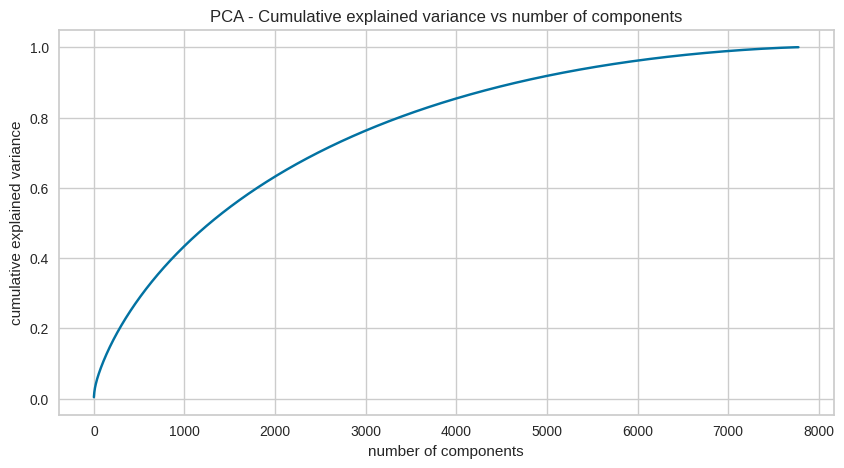

In [99]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

We find that 100% of the variance is explained by about ~7500 components. Also, more than 80% of the variance is explained just by 4000 components. Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance.

In [100]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=42)
pca.fit(X)

PCA(n_components=4000, random_state=42)

In [101]:
# transformed features
x_pca = pca.transform(X)

In [102]:
# shape of transformed vectors
x_pca.shape

(7777, 4000)

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***